Exploratory Data Analysis on Fetal Health Data
Name : Krishnaben Baldha
Student ID : Q15937305

In [2]:
#Importing necessary libraries

import numpy as np
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy.stats import probplot,skew
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#Loading the data from csv file

# https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?select=fetal_health.csv

fetal_health = read_csv("dataset/fetal_health.csv")
fetal_health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
#Checking the shape of data

fetal_health.shape

(2126, 22)

In [6]:
# data information with datatype
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
#Describing the data
print(fetal_health.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

In [8]:
#checking the missing values
empty_data = fetal_health[fetal_health.isna().any(axis=1)]
print('\nThis is the missing data\n', empty_data)


This is the missing data
 Empty DataFrame
Columns: [baseline value, accelerations, fetal_movement, uterine_contractions, light_decelerations, severe_decelerations, prolongued_decelerations, abnormal_short_term_variability, mean_value_of_short_term_variability, percentage_of_time_with_abnormal_long_term_variability, mean_value_of_long_term_variability, histogram_width, histogram_min, histogram_max, histogram_number_of_peaks, histogram_number_of_zeroes, histogram_mode, histogram_mean, histogram_median, histogram_variance, histogram_tendency, fetal_health]
Index: []

[0 rows x 22 columns]


In [9]:
empty_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


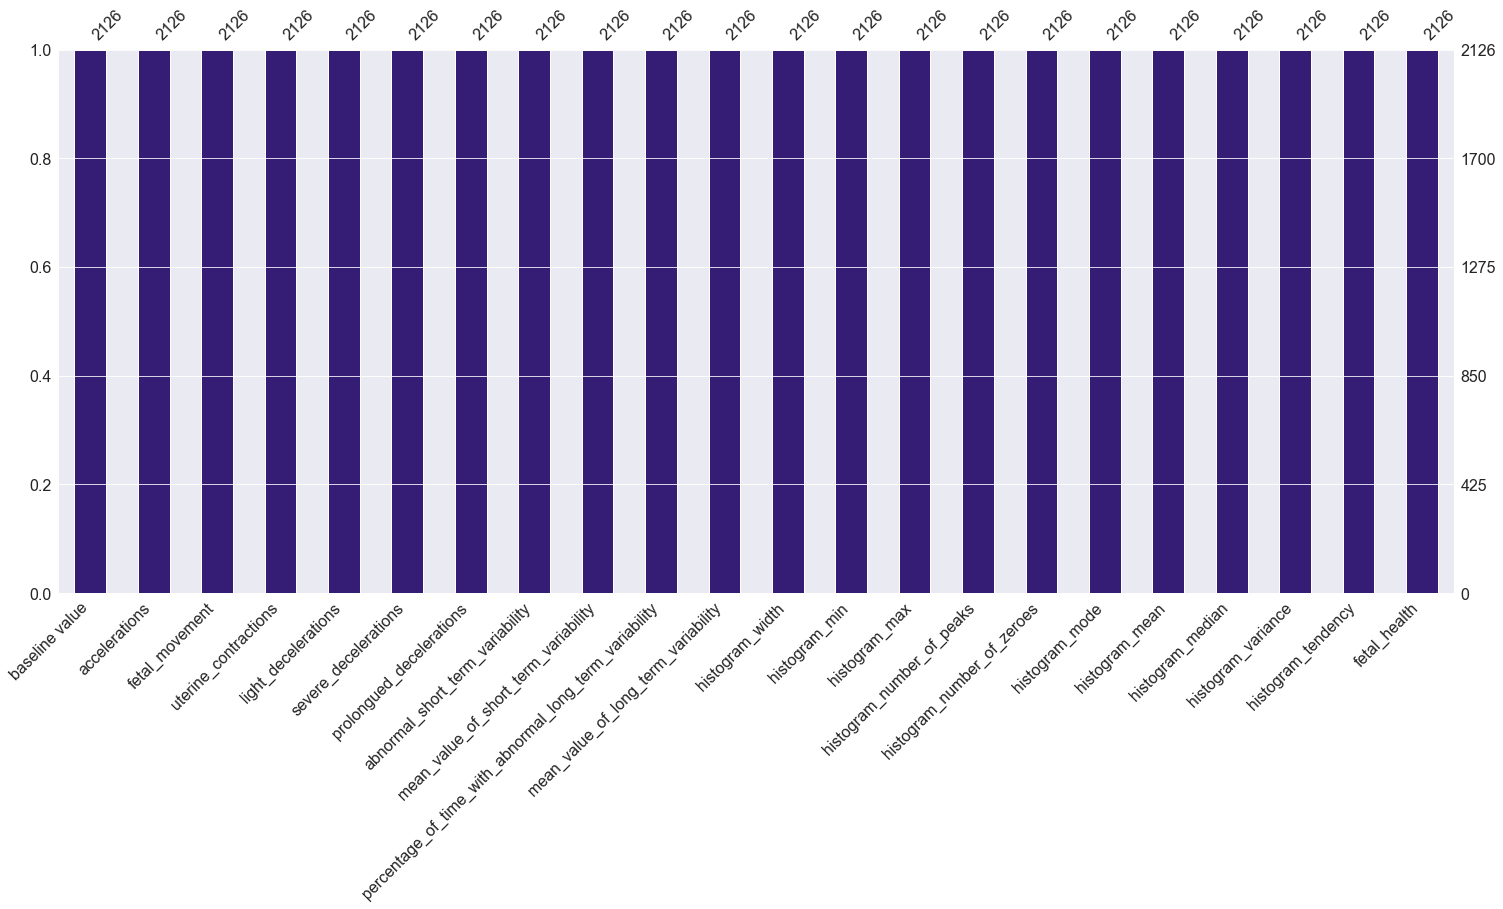

In [10]:
#checking the null value
fetal_health.isnull().sum().sum()
#null count analysis
null_plot = msno.bar(fetal_health, color = "#351c75")

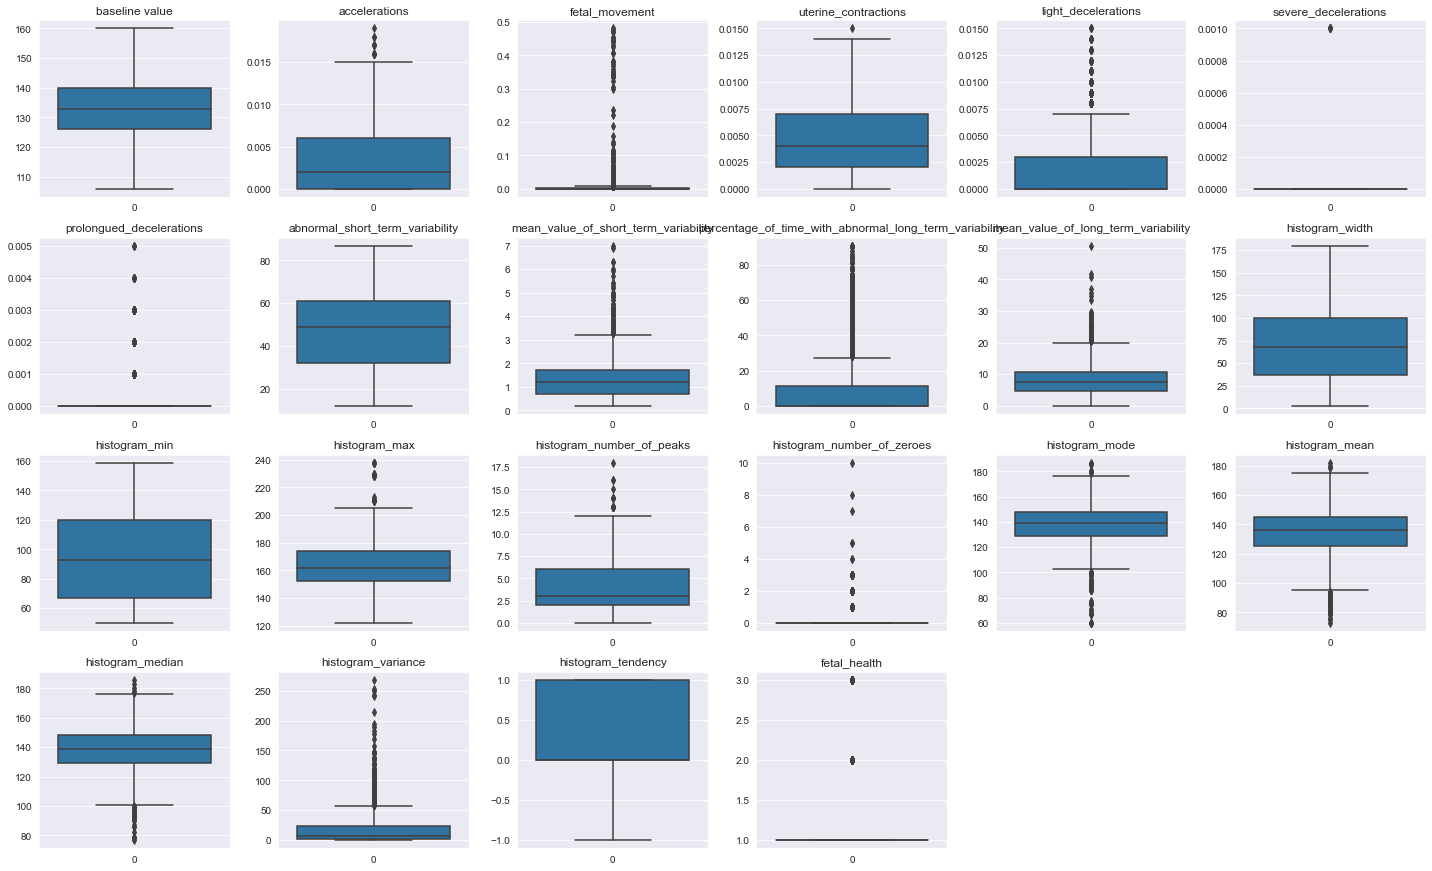

In [11]:
# box plot of all features and target
plt.figure(figsize=(20, 15))

for i, column in enumerate(fetal_health.columns):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=fetal_health[column])
    plt.title(column)

plt.tight_layout()
plt.show()

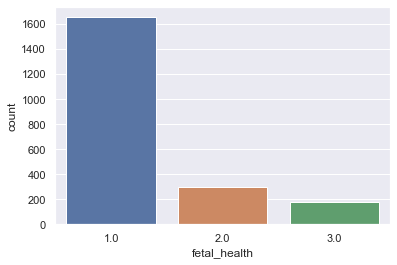

In [12]:
#Plotting dependent variable using count plot
sns.set()
sns.countplot(fetal_health["fetal_health"])
plt.show()

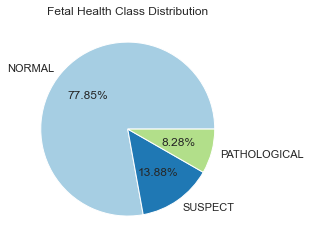

In [13]:
#Visualizing the fetal health column data/Target variable
plt.figure(figsize=(4, 4))

plt.pie(
    fetal_health['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=["NORMAL", "SUSPECT", "PATHOLOGICAL"],
    colors=sns.color_palette('Paired')
)

plt.title("Fetal Health Class Distribution")
plt.show()

In [14]:
# Checking the skewness of data
print(fetal_health.skew().sort_values(ascending=True)[:])

histogram_mode                                            -0.995178
histogram_mean                                            -0.651019
histogram_median                                          -0.478414
histogram_tendency                                        -0.311632
abnormal_short_term_variability                           -0.011829
baseline value                                             0.020312
histogram_min                                              0.115784
uterine_contractions                                       0.159315
histogram_width                                            0.314235
histogram_max                                              0.577862
histogram_number_of_peaks                                  0.892886
accelerations                                              1.204392
mean_value_of_long_term_variability                        1.331998
mean_value_of_short_term_variability                       1.657339
light_decelerations                             

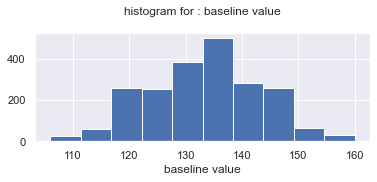

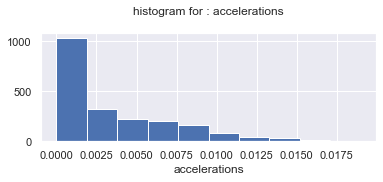

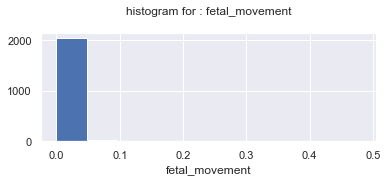

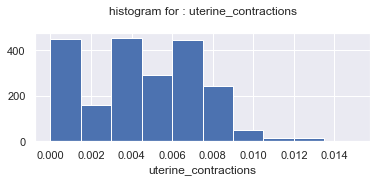

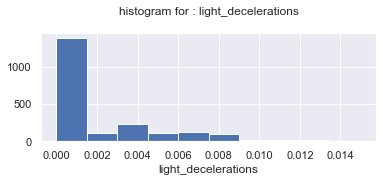

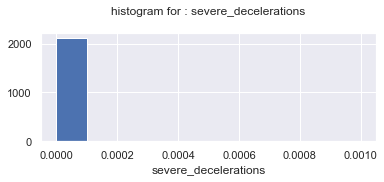

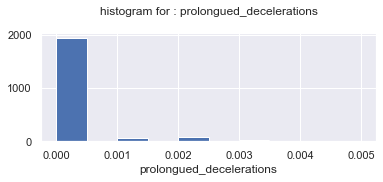

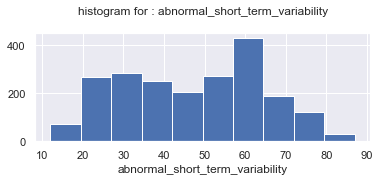

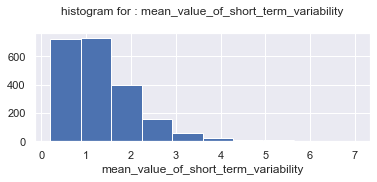

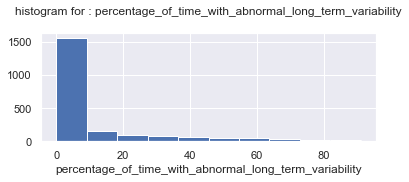

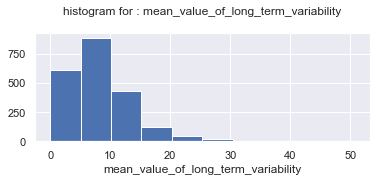

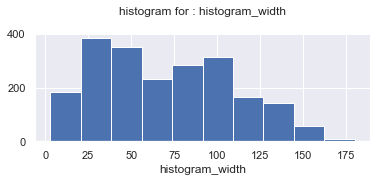

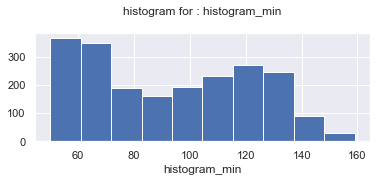

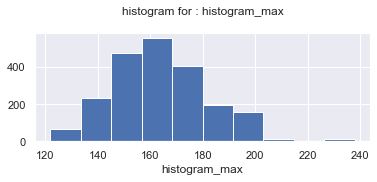

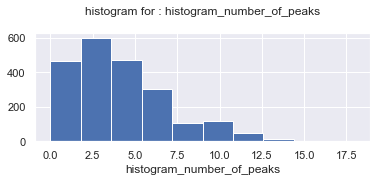

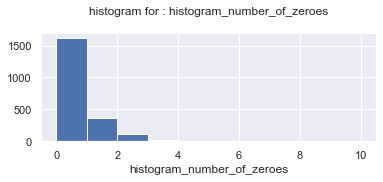

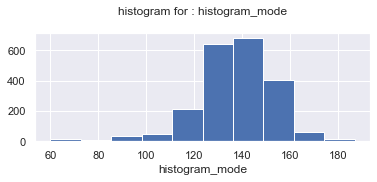

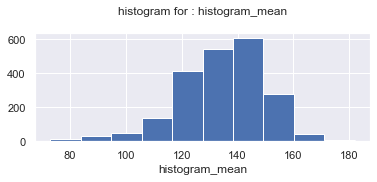

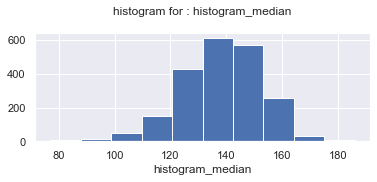

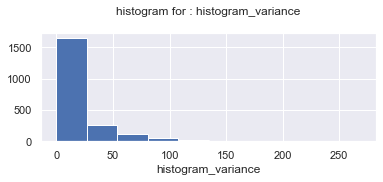

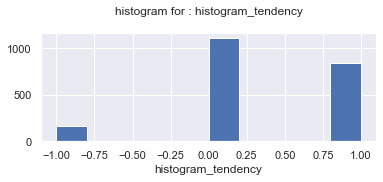

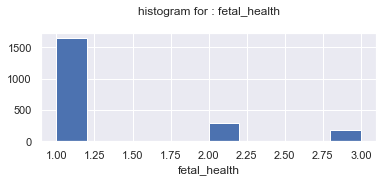

In [15]:
# Uni-variate Analysis : Observing the histogram of all features
# Uni-variate Analysis : A variable's relation to itself
# Checking the skewness of data also through the histograms or distributions of data

numerical_features=[feature for feature in fetal_health.columns if fetal_health[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:

        plt.figure(figsize=(6,2))
        fetal_health[feature].hist()
        plt.xlabel(feature)
        plt.title(f'histogram for : {feature}\n')
        plt.show()

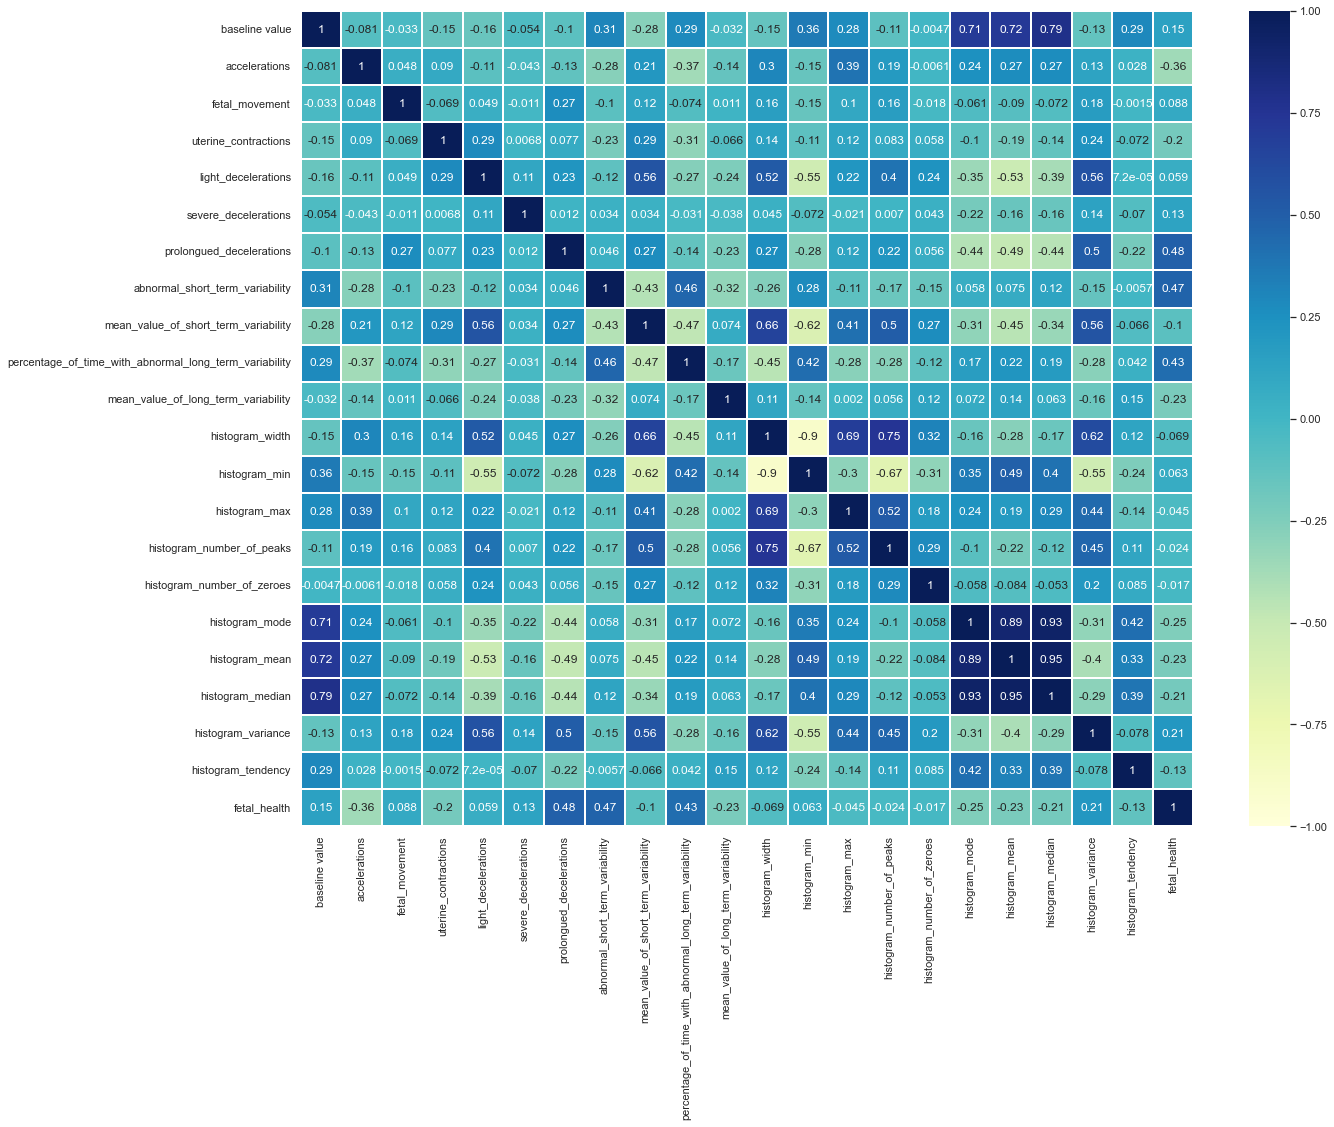

In [16]:
# Bi-variate Analysis : Observing 2 variables relation through correlation coefficient
#check data correlation
plt.figure(figsize=(20,15))
corr = fetal_health.corr()
sns.heatmap(corr, linewidths=0.1, cmap="YlGnBu", annot= True, vmin=-1, vmax=1, square=False)
corr = fetal_health.corr()

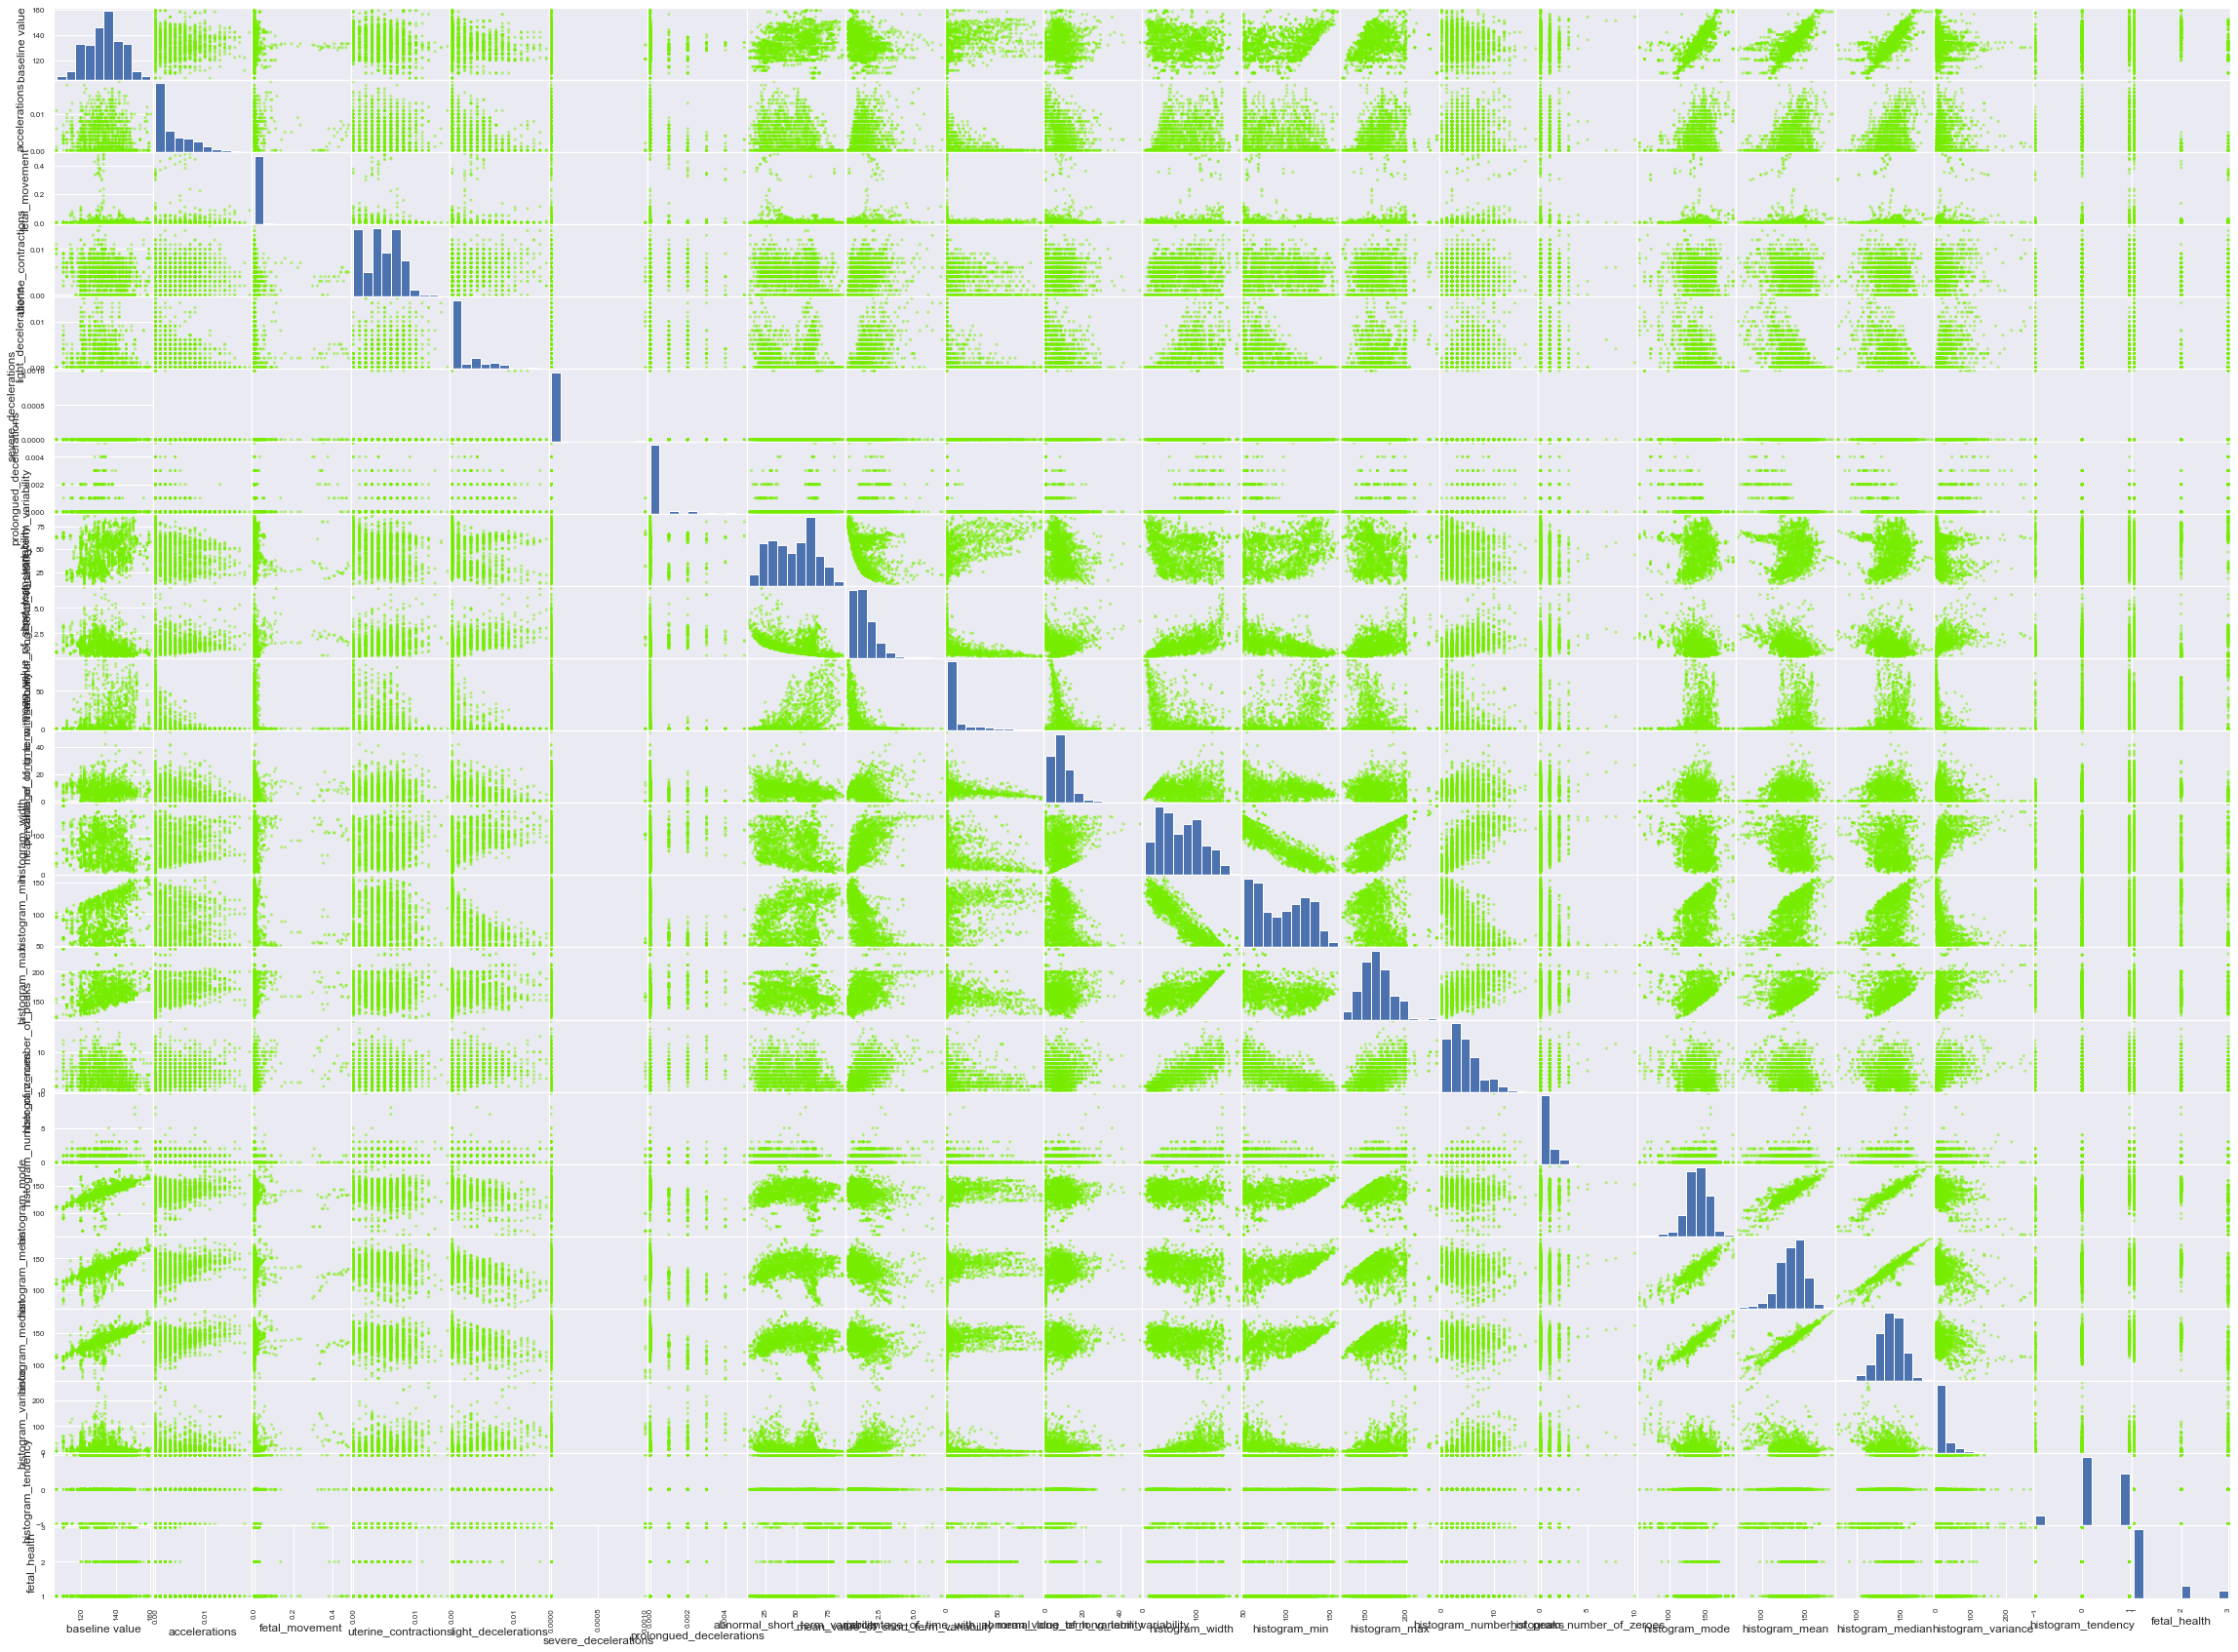

In [17]:
#scatter plot
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(fetal_health,figsize=(40, 30), color = "#76EE00")

In [18]:
# Creating the input cols/features X and output col/target y
X = fetal_health.drop(['fetal_health'], axis=1)
y = fetal_health['fetal_health']

In [19]:
#Checking the shape for input X, output col y
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(2126, 21) (2126,)


In [20]:
# Selecting the best features : Feature Selection
# To get the better accuracy
# To avoid the complexity of model
# To reduce the dimensionality of model
# To avoid the Over fitting
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Feature','Score']                             #naming the dataframe columns
print(featureScores)

                                              Feature       Score
0                                      baseline value  140.621076
1                                       accelerations  196.027523
2                                      fetal_movement   11.679797
3                                uterine_contractions   93.715743
4                                 light_decelerations   66.864754
5                                severe_decelerations   28.448156
6                            prolongued_decelerations  505.853206
7                     abnormal_short_term_variability  343.820419
8                mean_value_of_short_term_variability  119.882006
9   percentage_of_time_with_abnormal_long_term_var...  345.156385
10                mean_value_of_long_term_variability   70.174093
11                                    histogram_width   55.088241
12                                      histogram_min   87.340503
13                                      histogram_max    2.464923
14        

<AxesSubplot:xlabel='Score', ylabel='Feature'>

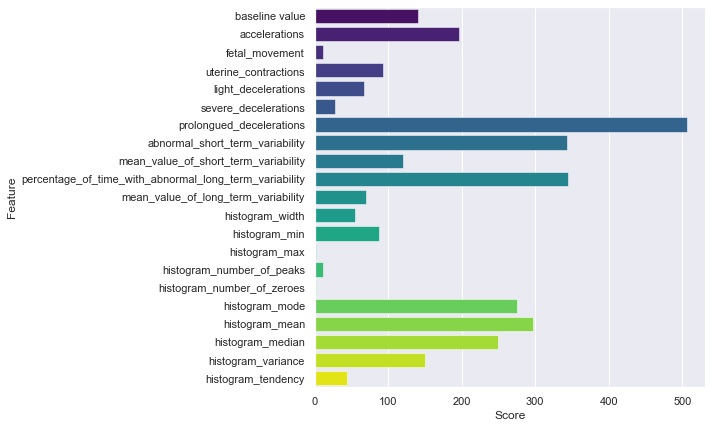

In [21]:
#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
plot

In [22]:
# Selecting the best 10 features which are correlated to Target columns and creating new X as X_new
bestfeatures_10 = SelectKBest(score_func=f_classif, k=10)
X_new = bestfeatures_10.fit_transform(X,y)

In [23]:
# Renaming target values
y = y.replace({
    1: 0,
    2: 1,
    3: 2
})
y = y.astype('int')
y                               # printing the y column or target column to check if values renamed correctly

0       1
1       0
2       0
3       0
4       0
       ..
2121    1
2122    1
2123    1
2124    1
2125    0
Name: fetal_health, Length: 2126, dtype: int32

In [24]:
# Using the Minmax Scalar to normalize the data
# Creating the Scaler for transforming the data to normalized values as part of data-preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled_data = scaler.fit_transform(X_new.reshape(2126,10))
y_final = y.values.reshape(-1,1)

In [25]:
# Checking the shape of X and y after selecting 10 best features through feature selection
print(X_scaled_data.shape,y_final.shape)

(2126, 10) (2126, 1)


In [26]:
# Splitting the data
split_percent = 0.8
split = int(split_percent*len(X))

X_train = X_scaled_data[:split]
X_test = X_scaled_data[split:]

y_train = y_final[:split]
y_test = y_final[split:]

In [27]:
# Checking the shape of data after train-test split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1700, 10) (1700, 1)
(426, 10) (426, 1)


In [28]:
# Training the model
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Neural Network": MLPClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
}

In [29]:
# Model fitting
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    print(name + ": {:.5f}".format(model.score(X_train, y_train)))

Decision Tree trained.
Decision Tree: 0.99882
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (Linear Kernel): 0.89882
Neural Network trained.
Neural Network: 0.90529
Gradient Boosting trained.
Gradient Boosting: 0.98588
XGBoost trained.
XGBoost: 0.99882


Model : Decision Tree
Decision Tree Accuracy: 0.70423
Decision Tree Mean absolute error: 0.36
Decision Tree Mean squared error: 0.49
Decision Tree R2 score: 0.20313543847147386
Decision Tree Confusion Matrix : 
 [[224  95  21]
 [  0   3   2]
 [  7   1  73]]
-----------------------------------------------------------------------------
Classification Report for model :  Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.66      0.78       340
           1       0.03      0.60      0.06         5
           2       0.76      0.90      0.82        81

    accuracy                           0.70       426
   macro avg       0.59      0.72      0.56       426
weighted avg       0.92      0.70      0.78       426



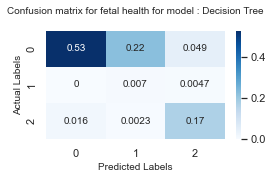

-----------------------------------------------------------------------------
Model : Support Vector Machine (Linear Kernel)
Support Vector Machine (Linear Kernel) Accuracy: 0.77934
Support Vector Machine (Linear Kernel) Mean absolute error: 0.30
Support Vector Machine (Linear Kernel) Mean squared error: 0.45
Support Vector Machine (Linear Kernel) R2 score: 0.27902730147419064
Support Vector Machine (Linear Kernel) Confusion Matrix : 
 [[255  61  24]
 [  0   5   0]
 [  8   1  72]]
-----------------------------------------------------------------------------
Classification Report for model :  Support Vector Machine (Linear Kernel)
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       340
           1       0.07      1.00      0.14         5
           2       0.75      0.89      0.81        81

    accuracy                           0.78       426
   macro avg       0.60      0.88      0.60       426
weighted avg       0.92      0.78   

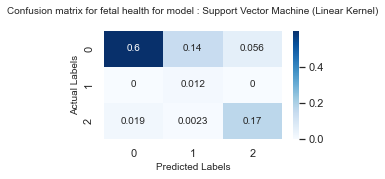

-----------------------------------------------------------------------------
Model : Neural Network
Neural Network Accuracy: 0.79343
Neural Network Mean absolute error: 0.27
Neural Network Mean squared error: 0.41
Neural Network R2 score: 0.3359461987262282
Neural Network Confusion Matrix : 
 [[259  59  22]
 [  0   5   0]
 [  7   0  74]]
-----------------------------------------------------------------------------
Classification Report for model :  Neural Network
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       340
           1       0.08      1.00      0.14         5
           2       0.77      0.91      0.84        81

    accuracy                           0.79       426
   macro avg       0.61      0.89      0.61       426
weighted avg       0.92      0.79      0.84       426



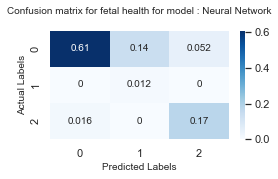

-----------------------------------------------------------------------------
Model : Gradient Boosting
Gradient Boosting Accuracy: 0.76291
Gradient Boosting Mean absolute error: 0.32
Gradient Boosting Mean squared error: 0.48
Gradient Boosting R2 score: 0.2183138110720172
Gradient Boosting Confusion Matrix : 
 [[267  65   8]
 [  0   5   0]
 [ 27   1  53]]
-----------------------------------------------------------------------------
Classification Report for model :  Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       340
           1       0.07      1.00      0.13         5
           2       0.87      0.65      0.75        81

    accuracy                           0.76       426
   macro avg       0.62      0.81      0.57       426
weighted avg       0.89      0.76      0.82       426



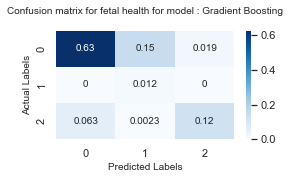

-----------------------------------------------------------------------------
Model : XGBoost
XGBoost Accuracy: 0.74178
XGBoost Mean absolute error: 0.32
XGBoost Mean squared error: 0.45
XGBoost R2 score: 0.2752327083240548
XGBoost Confusion Matrix : 
 [[248  82  10]
 [  0   5   0]
 [ 17   1  63]]
-----------------------------------------------------------------------------
Classification Report for model :  XGBoost
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       340
           1       0.06      1.00      0.11         5
           2       0.86      0.78      0.82        81

    accuracy                           0.74       426
   macro avg       0.62      0.84      0.58       426
weighted avg       0.91      0.74      0.81       426



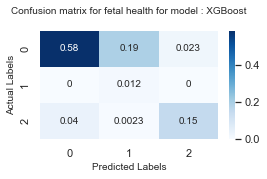

-----------------------------------------------------------------------------


In [30]:
# Model Evaluation on test data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
for name, model in models.items():

    print('Model : '+name)
    print(name + ' Accuracy: {:.5f}'.format(model.score(X_test, y_test)))

    pred_test = model.predict(X_test)
    #evaluate evaluation
    mae = mean_absolute_error(y_test, pred_test)
    mse = mean_squared_error(y_test, pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_test)

    #printing the model evaluation values
    print(name + ' Mean absolute error: {:.2f}'.format(mae))
    print(name + ' Mean squared error: {:.2f}'.format(mse))
    print(name + ' R2 score:', r2)
    matrix = confusion_matrix(y_test, pred_test)
    print(name + ' Confusion Matrix : \n', matrix)
    print('-----------------------------------------------------------------------------')

    print('Classification Report for model : ', name)
    print(classification_report(y_test, pred_test))

    plt.subplots(figsize = (4,2))
    cmap = sns.diverging_palette(250,10, s=80, l=55, n=9, as_cmap=True)
    sns.heatmap(matrix/np.sum(matrix), cmap='Blues', annot = True, annot_kws = {'size': 10})
    plt.xlabel('Predicted Labels', fontsize = 10)
    plt.ylabel('Actual Labels', fontsize = 10)
    plt.title(f'Confusion matrix for fetal health for model : {name}\n', fontsize = 10)
    plt.show()

    print('-----------------------------------------------------------------------------')
